### Librerias

In [158]:
import pandas as pd
import matplotlib.pyplot as plt


# Carga de datos

La base de datos _California Housing Prices_ contiene datos sobre el precio de casas en California, junto con la información de la casa como número de pisos, número de cuartos, etc. En este trabajo, se va a realizar un modelo de regresión lineal simple para predecir el precio de casas según la variable _median\_income_ la misma que se refiere a la medina de los ingresos de las casas aledañas a la que está en venta.

In [159]:
df = pd.read_csv('housing.csv')

In [160]:
df = df[['median_income', 'median_house_value']]
df.head()

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


# Estadistica descriptiva

In [161]:
df.describe()

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


En esta sección, se puede observar la distribución de la variable objetivo, la cual se puede describir como una distribución sesgada a la derecha, con una importante concentración de outliers entre los 450 y 550 mil dolares. Para evitar que el modelo se vea afectado negativamente por datos atípicos, se decidió eliminar los registros que se encuentren por encima del percentil 90.

<Axes: >

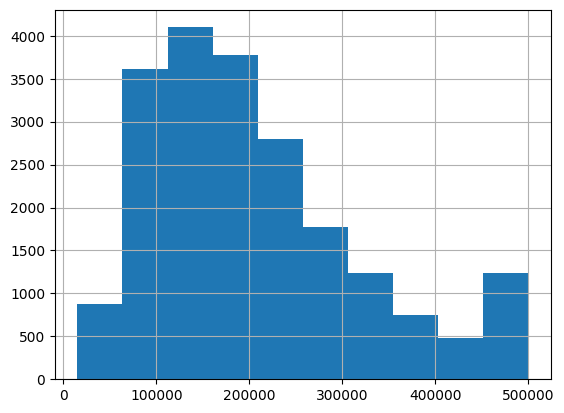

In [162]:
df.median_house_value.hist()

<Axes: >

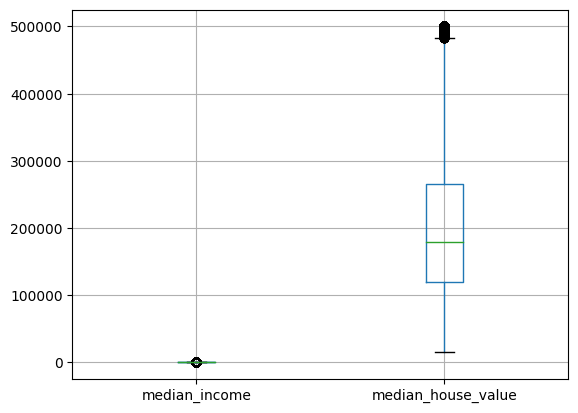

In [163]:
df.boxplot()

In [164]:
df = df[df["median_house_value"] < df["median_house_value"].quantile(0.90)]

<Axes: >

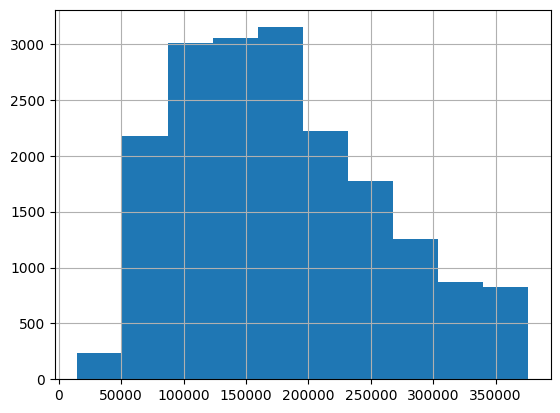

In [166]:
df.median_house_value.hist()

<Axes: >

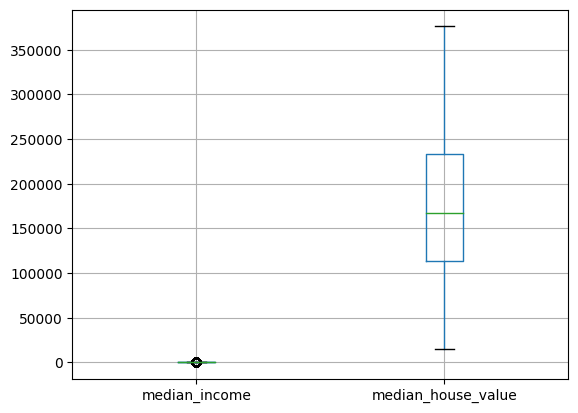

In [165]:
df.boxplot()

# Aplicacion del modelo

A continuación se definen las variables _x_ y _y_ del modelo, así como la función que se va a utilizar el momento de plantear la regresión.

In [167]:
# Crear lista con los valores de la variable independiente
x = df.median_income
# Crear lista con los valores de la variable dependiente
y = df.median_house_value

In [168]:
# Crear función lambda para la función de hipótesis
h = lambda x, theta: theta[0] + theta[1]*x
# Calcular el total de muestras a partir de los datos (n)
n = len(x)

## Gradiente descendiente
En esta sección, se hace uso de la técnica de gradiente descendiente para encontrar el modelo que mejor se ajuste a los datos. Para esto, se definen 6 diferentes valores de deltas (0.1, 0.01, en adelante) con el fin de encontrar el mejor valor de este hiperparámetro. El método de medida del error que se utilizará para comparar a los 6 modelos, es la medición MAPE (Mean Absolute Percentage Error) el cual presenta el error del modelo de forma porcentual, para que sea más fácil su evaluación.

In [175]:
#array para iterar con diferentes valores de delta
delta_it = [10, 100, 1000, 10000, 100000, 1000000]
#array que guarde el MAPE del modelo con cada valor de delta diferente
mape = []
#array que guarde los thetas finales de cada modelo
theta_fin = []

In [176]:
for i in delta_it:
  # Crear lista con los hiper-parámetros iniciales (thetas)
  theta = [0, 10]
  # Cargar el valor del learning rate (alpha)
  alpha = 1/i

  for i in range (150):
    delta0 = []
    delta1 = []
    mape_ind = []
    for xi,yi in zip (x,y):
      pred = h(xi, theta)

      delta0.append(pred - yi)
      delta1.append((pred - yi)*xi)
      mape_ind.append(abs((yi - pred))/yi)

    dJt0 = 1/n*sum(delta0)
    dJt1 = 1/n*sum(delta1)

    # Actualizar theta0
    # Actualizar theta1
    theta[0] = theta[0] - alpha * dJt0
    theta[1] = theta[1] - alpha * dJt1
    #print(theta)

  #Calculo del MSE de cada modelo
  mape.append( 1/n*sum(mape_ind)*100)
  theta_fin.append(theta)

## Evaluacion del modelo

Como se puede observar, el mejor MAPE entre los modelos, es del 30.04%, el cual corresponde a un delta de 0.001. Según la tabla de interpretación de los porcentajes del MAPE, este modelo se puede considerar como una predicción razonable; la cual, tomando en cuenta la distribución de los datos y que la mejor forma que habría para resolverlo es a través de algoritmos de Machine Learning más complejos, en este contexto es válida.

In [177]:
mape

[34.89564635807103,
 32.76593763693369,
 30.04005757647052,
 77.49898606847908,
 97.48533719630916,
 99.7260184017574]

# Predicción

En esta sección se realizó la predicción de la mitad del dataset, tomando en cuenta solamente los registros impares. Posteriormente se comparó con los datos reales mediante un scatter plot.

In [179]:
# Estimar para una parte del dataset
preds = []

for i in df.index[df.index%2 != 0]:
  preds.append(h(df.median_income[i], theta_fin[2]))

En esta gráfica se puede observar como los datos reales siguen una tendencia positiva, sin embargo esta no es marcada, pues los datos se encuentran bastante dispersos. Asimismo, las predicciones obtenidas siguen la misma tendencia que los valores reales.

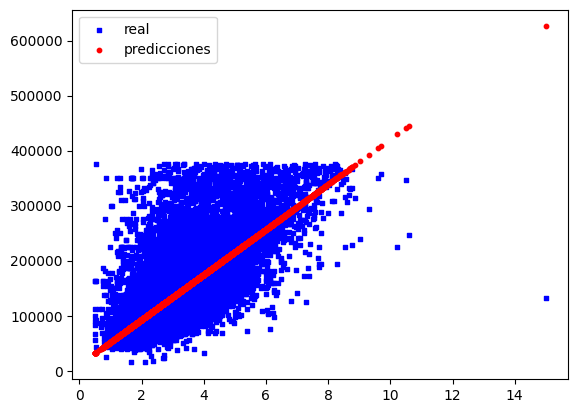

In [180]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df.median_income[df.index%2 != 0], df.median_house_value[df.index%2 != 0], s=10, c='b', marker="s", label='real')
ax1.scatter(df.median_income[df.index%2 != 0],preds, s=10, c='r', marker="o", label='predicciones')
plt.legend(loc='upper left')
plt.show()